In [1]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 72.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.3 MB/s eta 0:00:00

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import subplots

In [2]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize , poly)

In [6]:
df = load_data('Carseats')
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [8]:
preds = list(df.columns.drop('Sales'))
y = df['Sales']

In [9]:
preds

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [10]:
X = MS(preds).fit_transform(df)

In [11]:
model = sm.OLS(y,X)
result = model.fit()
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,5.6606,0.603,9.380,0.000
CompPrice,0.0928,0.004,22.378,0.000
Income,0.0158,0.002,8.565,0.000
Advertising,0.1231,0.011,11.066,0.000
Population,0.0002,0.000,0.561,0.575
Price,-0.0954,0.003,-35.700,0.000
ShelveLoc[Good],4.8502,0.153,31.678,0.000
ShelveLoc[Medium],1.9567,0.126,15.516,0.000
Age,-0.0460,0.003,-14.472,0.000
Education,-0.0211,0.020,-1.070,0.285


array([[<Axes: xlabel='intercept', ylabel='intercept'>,
        <Axes: xlabel='CompPrice', ylabel='intercept'>,
        <Axes: xlabel='Income', ylabel='intercept'>,
        <Axes: xlabel='Advertising', ylabel='intercept'>,
        <Axes: xlabel='Population', ylabel='intercept'>,
        <Axes: xlabel='Price', ylabel='intercept'>,
        <Axes: xlabel='ShelveLoc[Good]', ylabel='intercept'>,
        <Axes: xlabel='ShelveLoc[Medium]', ylabel='intercept'>,
        <Axes: xlabel='Age', ylabel='intercept'>,
        <Axes: xlabel='Education', ylabel='intercept'>,
        <Axes: xlabel='Urban[Yes]', ylabel='intercept'>,
        <Axes: xlabel='US[Yes]', ylabel='intercept'>],
       [<Axes: xlabel='intercept', ylabel='CompPrice'>,
        <Axes: xlabel='CompPrice', ylabel='CompPrice'>,
        <Axes: xlabel='Income', ylabel='CompPrice'>,
        <Axes: xlabel='Advertising', ylabel='CompPrice'>,
        <Axes: xlabel='Population', ylabel='CompPrice'>,
        <Axes: xlabel='Price', ylabel='CompP

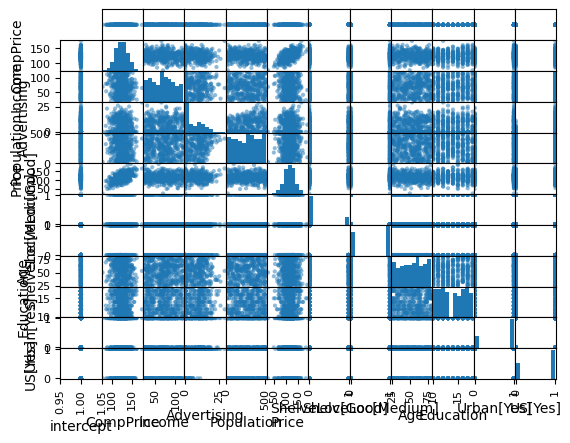

In [16]:
# fig,ax = subplots(figsize=(8,8))
pd.plotting.scatter_matrix(X)